In [1]:
import matplotlib.pyplot as plt
import numpy as np
import emachine as EM
import itertools
from joblib import Parallel, delayed
#from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)

In [3]:
n_var = 40 ; g = 0.5 ; n_seq = 10000

In [4]:
# Synthetic data are generated by using `generate_seq`.
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)
print(seqs.shape)

ops = EM.operators(seqs)
print(ops.shape)

(10000, 40)
(10000, 820)


In [5]:
# predict interactions w
eps_list = np.linspace(0.4,0.8,9)
n_eps = len(eps_list)
res = Parallel(n_jobs = n_eps)(delayed(EM.fit)(ops,eps=eps,max_iter=100) for eps in eps_list)
w_eps = np.array([res[i][0] for i in range(len(res))])
#dw_eps = np.array([res[i][1] for i in range(len(res))])

#e_eps = np.zeros(len(eps_list))
#w_eps = np.zeros((len(eps_list),ops.shape[1]))
#for i,eps in enumerate(eps_list):
#    w_eps[i,:],e_eps[i] = EM.fit(ops,w_true,eps=eps,max_iter=100)
    #print('eps and e_eps:',eps,e_eps[i])

In [6]:
E = -ops.dot(w_eps.T)       # [n_seq,n_eps]
E_av = E.mean(axis=0)       # [n_eps]

In [7]:
seqs_unique = np.unique(seqs,axis=0)
print(seqs_unique.shape)

ops_unique = EM.operators(seqs_unique)
print(ops_unique.shape)

(6939, 40)
(6939, 820)


In [8]:
E_unique = -ops_unique.dot(w_eps.T) # [n_seq,n_eps]
P_unique = np.exp(-E_unique)        # [n_seq,n_eps]

Z_unique = P_unique.mean(axis=0)[np.newaxis,:] # [:,n_eps]
P_unique /= Z_unique  # [n_seq,n_eps]

Ep_av = (E_unique*P_unique).mean(axis=0)

In [9]:
MSE = ((w_eps - w_true[np.newaxis,:])**2.).mean(axis=1)

In [10]:
dEEp = np.abs(E_av-Ep_av)
dEEp2 = (E_av-Ep_av)**2

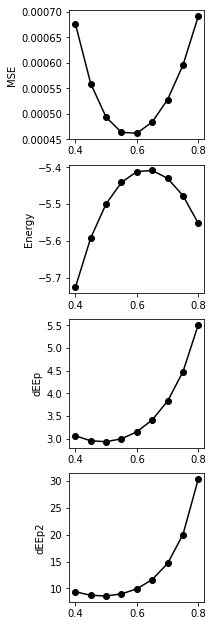

In [12]:
nx,ny = 1,4
fig, ax = plt.subplots(ny,nx,figsize=(nx*3,ny*2.2))

ax[0].plot(eps_list, MSE,'ko-')
ax[1].plot(eps_list, E_av,'ko-')
ax[2].plot(eps_list, dEEp,'ko-')
ax[3].plot(eps_list, dEEp2,'ko-')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('Energy')
ax[2].set_ylabel('dEEp')
ax[3].set_ylabel('dEEp2')

plt.tight_layout(h_pad=0.5, w_pad=0.6)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)